<a href="https://colab.research.google.com/github/chakravartulavinay/TimeSeriesforecast/blob/main/TimeSeriesforecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import itertools
import statsmodels.api as sm

# Data Preprocessing

In [ ]:
data_df = pd.read_excel('/content/drive/MyDrive/Projects/Timeseriesforecast/Sample - Superstore.xls')

In [ ]:
data_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
data_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

understdanding the data

In [ ]:
data_df = data_df[['Order Date', 'Category','Sales']]

In [ ]:
data_df

,Order Date,Category,Sales
0,2016-11-08,Furniture,261.9600
1,2016-11-08,Furniture,731.9400
2,2016-06-12,Office Supplies,14.6200
3,2015-10-11,Furniture,957.5775
4,2015-10-11,Office Supplies,22.3680
...,...,...,...
9989,2014-01-21,Furniture,25.2480
9990,2017-02-26,Furniture,91.9600
9991,2017-02-26,Technology,258.5760
9992,2017-02-26,Office Supplies,29.6000


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Category    9994 non-null   object        
 2   Sales       9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 234.4+ KB


In [ ]:
data_df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [ ]:
# Extract the data of Office Supplies
furniture_df = data_df.loc[data_df['Category'] == 'Furniture']

In [ ]:
furniture_df  = furniture_df .sort_values('Order Date')
furniture_df = furniture_df.groupby('Order Date')['Sales'].sum().reset_index()

In [ ]:
furniture_df

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


*Visualizing* the time series

In [ ]:
furniture_df .set_index('Order Date', inplace=True)

In [ ]:
furniture_df

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


checking the time series

In [ ]:
furniture_df.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [ ]:
furniture_df = furniture_df['Sales'].resample('MS').mean().to_frame()
# MS = Month Start frequency

In [ ]:
furniture_df

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


Visualising Trend, Pattern, Seasonalities and Observations

In [ ]:
# A function to generate plot with trend line
import numpy as np
import matplotlib.dates as mdates
def generate_plot(data_df,x= None, title=None, xlabel="Order Date", ylabel="Sales", dpi=100, title_size=20, label_size=12):
    plt.figure(figsize=(20, 5), dpi=dpi)
    plt.plot(data_df.index, x, color='b')

    # Calculate the trend line
    trend = np.polyfit(range(len(data_df)), x, 1)
    trend_line = np.poly1d(trend)
    plt.plot(data_df.index, trend_line(range(len(data_df))), color='r', linestyle='--', label='Trend Line')

    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=90,fontsize=14)
    plt.xlabel(xlabel, fontsize=label_size)  # Increase x-axis label size
    plt.ylabel(ylabel, fontsize=label_size)  # Increase y-axis label size
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Month and Year format
    plt.grid(True, alpha=0.4)  # Add grid with light opacity
    plt.gca().title.set_fontsize(title_size) # Increase title size
    plt.show()

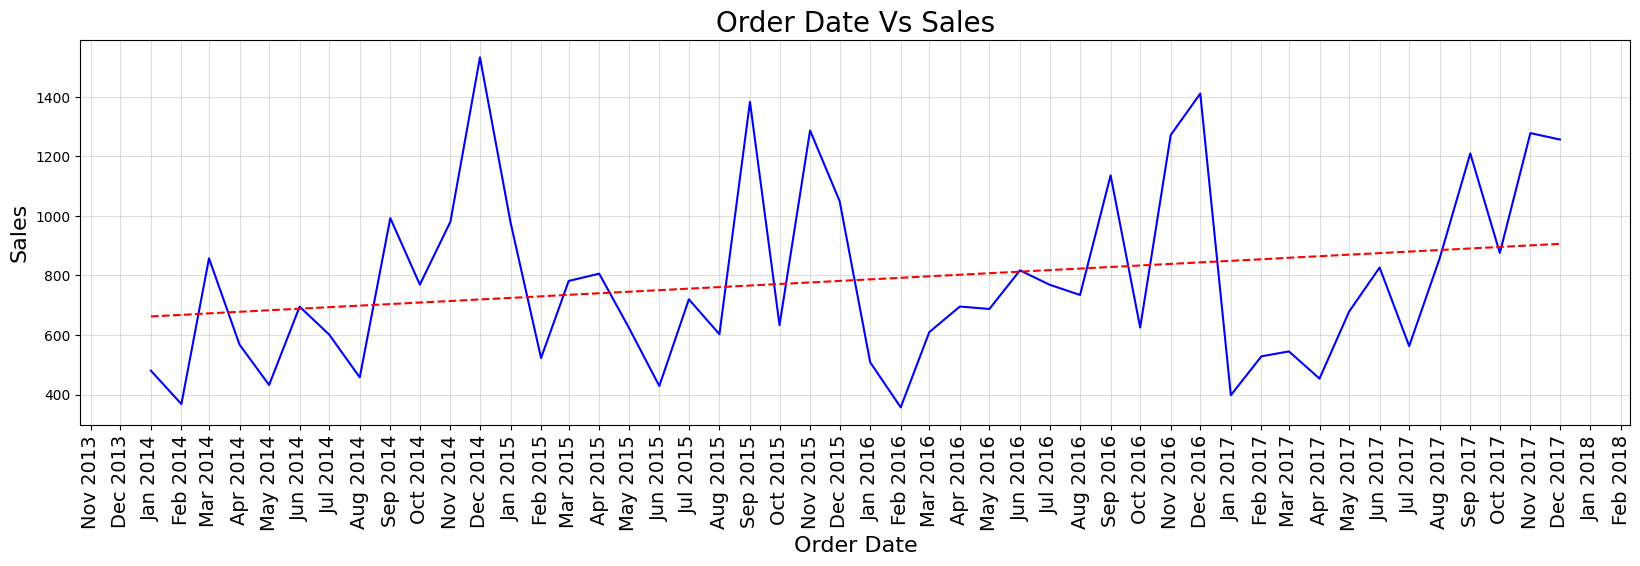

In [ ]:
generate_plot(furniture_df ,x= furniture_df["Sales"], title="Order Date Vs Sales", xlabel="Order Date", ylabel="Sales", dpi=100,title_size=20, label_size=16)

Decomposition and Components of the Times series

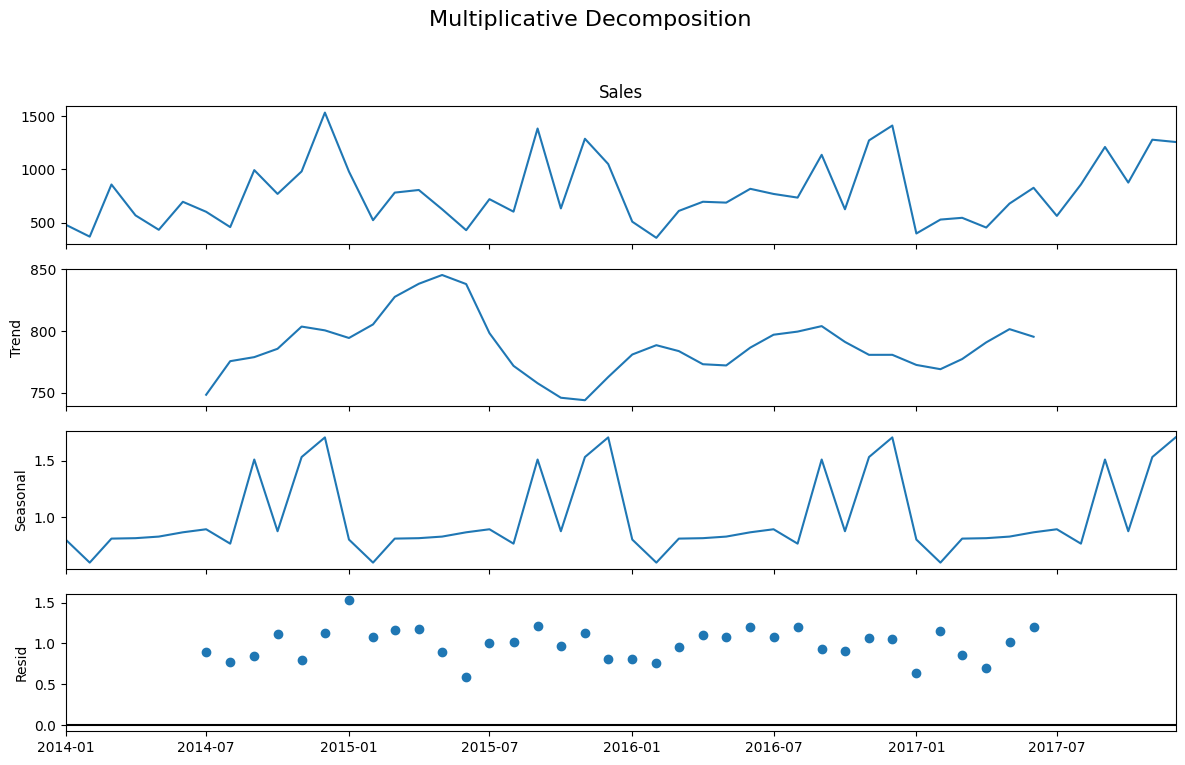

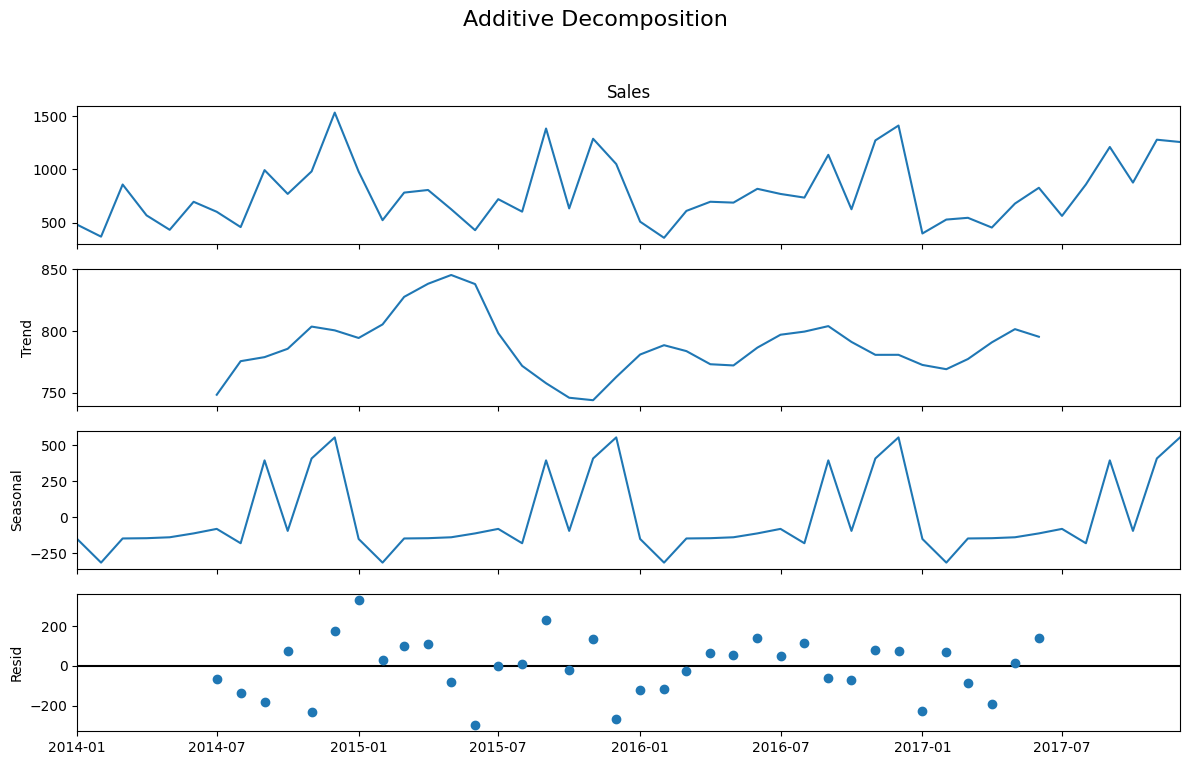

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform Additive Decomposition
decomposition_add = seasonal_decompose(furniture_df["Sales"], model='additive')

# Perform Multiplicative Decomposition
decomposition_mul = seasonal_decompose(furniture_df["Sales"], model='multiplicative')

# Plot
plt.rcParams.update({'figure.figsize': (12,8)})

decomposition_mul.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

decomposition_add.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Testing for Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(furniture_df['Sales'])

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Compare p-value with significance level
if p_value < 0.05:
    print("The time series is stationary (reject null hypothesis)")
else:
    print("The time series is non-stationary (fail to reject null hypothesis)")

# Print ADF test statistics and p-value
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

The time series is stationary (reject null hypothesis)
ADF Statistic: -5.191070187339275
p-value: 9.1687566556655e-06


Differencing and Transformation

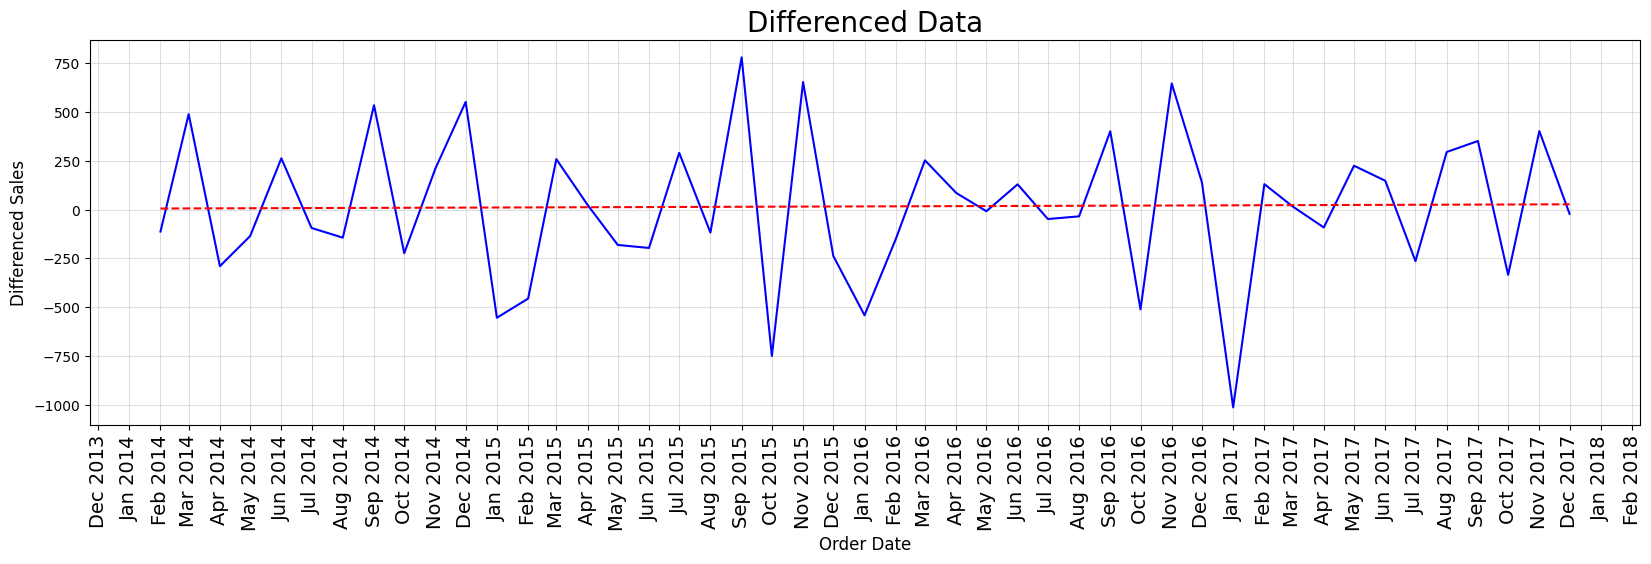

In [ ]:
# Apply differencing to make the data stationary
furniture_df['Differenced_Data'] = furniture_df['Sales'].diff()
# Drop missing values
furniture_df.dropna(inplace=True)
# Plot the differenced data
generate_plot(furniture_df, x=furniture_df['Differenced_Data'], title='Differenced Data', ylabel='Differenced Sales')

Autocorrelation and Partial Autocorrelation Analysis

In [ ]:
len(furniture_df['Sales'])

47

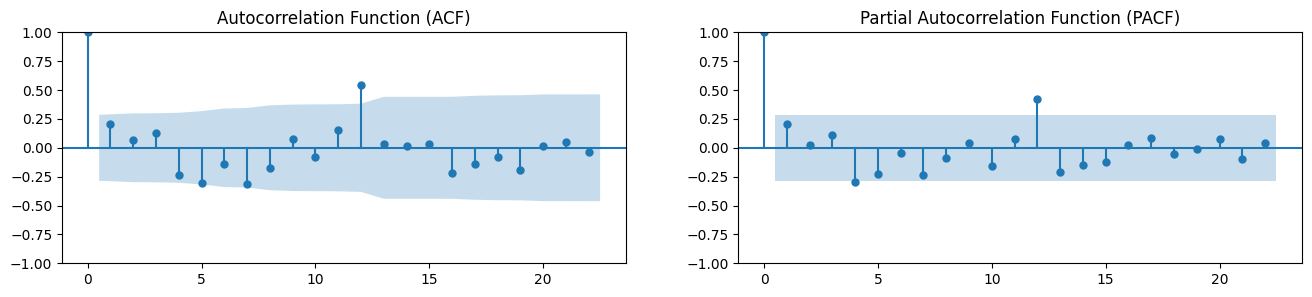

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create subplots for ACF and PACF
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 3))

# Compute ACF and PACF
plot_acf(furniture_df['Sales'], lags=22, ax=ax1)
plot_pacf(furniture_df['Sales'], lags=22, ax=ax2)

# Set plot  title
ax1.set_title('Autocorrelation Function (ACF)')
ax2.set_title('Partial Autocorrelation Function (PACF)')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plots
plt.show()

Split the Dataset

In [ ]:
furniture_df  = furniture_df.drop('Differenced_Data', axis=1)

In [ ]:
import pandas as pd

# Assuming your dataset is named 'office_supplies_df1' with 'Sales' as a column and 'Order Date' as the index

# Convert the index ('Order Date') to datetime if it's not already
furniture_df.index = pd.to_datetime(furniture_df.index)

# Split the dataset into training and testing sets
train_df = furniture_df.loc[:'2017-01-01']
test_df = furniture_df.loc['2017-01-01':]

In [ ]:
train_df.shape

(36, 1)

In [ ]:
test_df.shape

(12, 1)

Handle Missing Values

In [ ]:
#no missing values

Normalize or Scale the Data

In [ ]:
#Here in this dataset the data is already scaled

#Time series Forecasting Models

Moving-average model s
- **Auto Regression(AR)**
- **Moving Average (MA)**
- **Auto Regression Moving Average(ARMA)**
- **Auto Regression Integrated Moving Average(ARIMA)**
- **Seasonal Regression Integrated Moving Average(SARIMA)**
- **Auto ARIMA**

#Auto Regression(AR)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Set the lag order, e.g., AR(1)
lag_order = 1

# Build Model
ar_model = ARIMA(train_df, order=(lag_order, 0, 0))
ar_model_fit = ar_model.fit()

# Print AIC value
print(f"AIC: {ar_model_fit.aic}")

AIC: 520.0107160877094


In [ ]:
# Make predictions on the testing set
predictions = ar_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

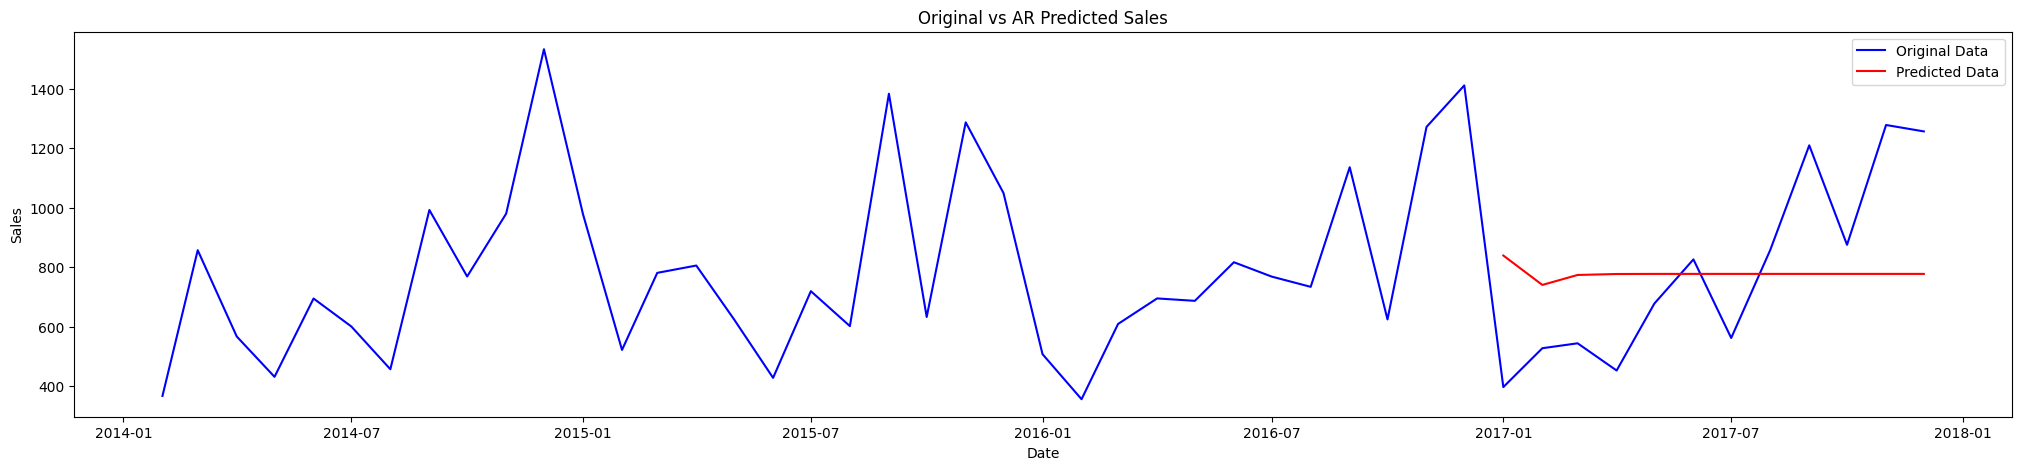

In [ ]:
# Plot the actual values and predictions
plt.figure(figsize=(25,5))

plt.plot(furniture_df.index, furniture_df['Sales'], label='Original Data', color='blue')
plt.plot(test_df.index, predictions, label='Predicted Data', color='red')

plt.title('Original vs AR Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 94843.1845023728
Mean Absolute Error (MAE): 263.2836954443755
Root Mean Squared Error (RMSE): 307.96620675387874


# Moving Average(MA)

In [ ]:
# Set the lag order, e.g., MA(1)
lag_order = 1

# Build Model
ma_model = ARIMA(train_df, order=(0, 0, lag_order))
ma_model_fit = ma_model.fit()

# Print AIC value
print(f"AIC: {ma_model_fit.aic}")

AIC: 520.0097119277688


In [ ]:
# Make predictions on the testing set
predictions = ma_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

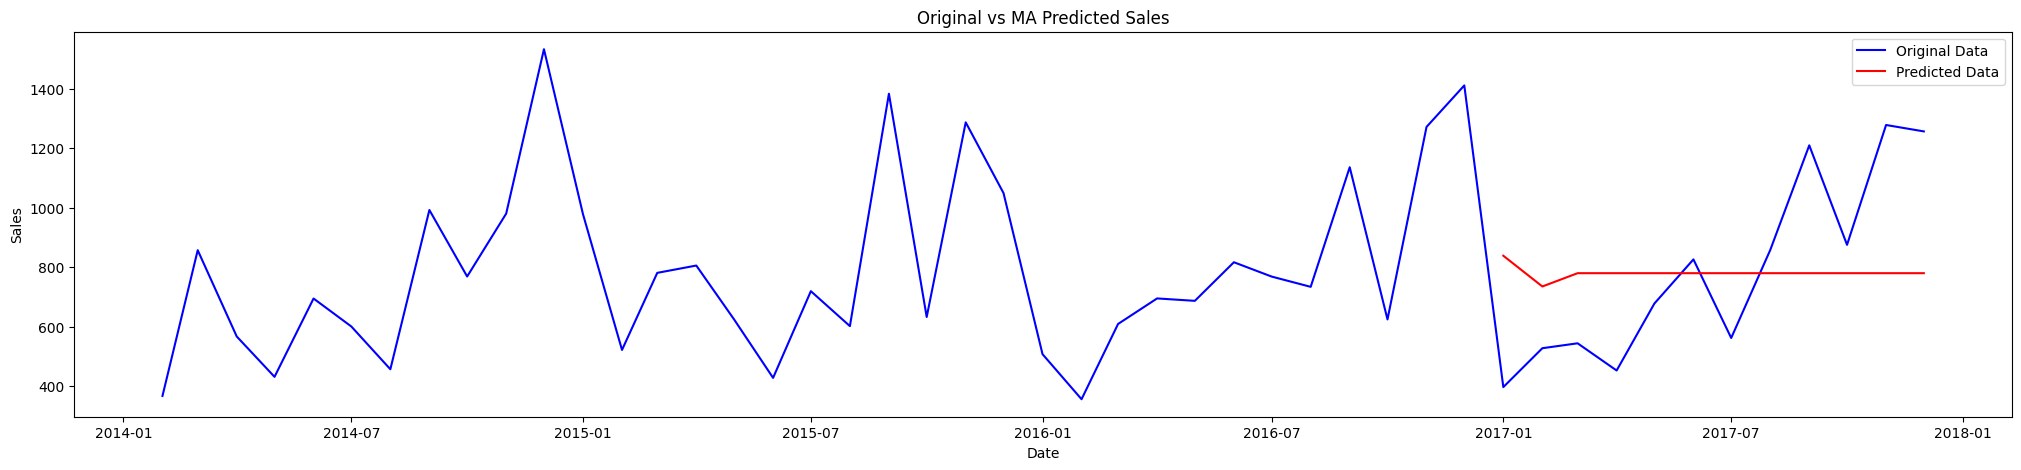

In [ ]:
# Plot the actual values and predictions
plt.figure(figsize=(25,5))

plt.plot(furniture_df.index, furniture_df['Sales'], label='Original Data', color='blue')
plt.plot(test_df.index, predictions, label='Predicted Data', color='red')

plt.title('Original vs MA Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 94466.15426461614
Mean Absolute Error (MAE): 262.72441152771586
Root Mean Squared Error (RMSE): 307.3534679560589


#Auto Regression Moving Average(ARMA)

In [ ]:
# Set the lag order, e.g.,AR(1) and MA(1)
lag_order = 1

# Build Model
arma_model = ARIMA(train_df, order=(lag_order,0,lag_order))
arma_model_fit = arma_model.fit()

# Print AIC value
print(f"AIC: {arma_model_fit.aic}")

AIC: 521.7686882637304


In [ ]:
# Make predictions on the testing set
predictions = arma_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

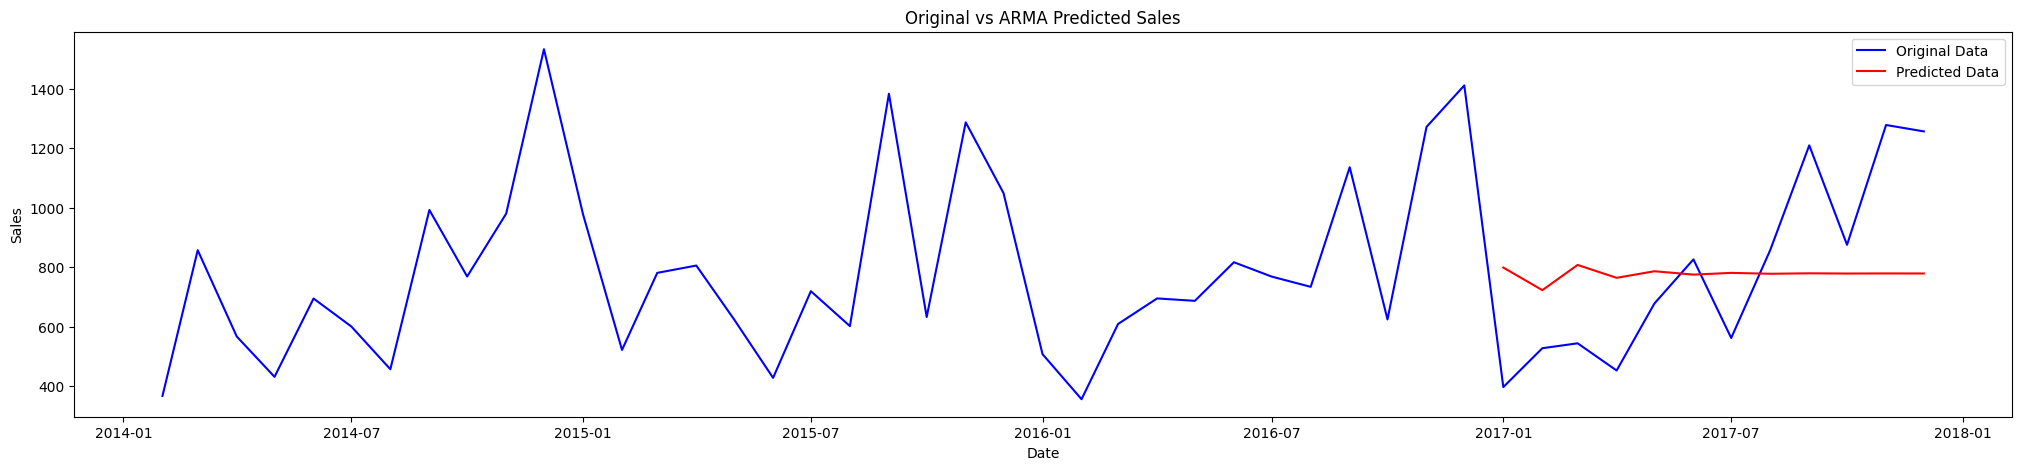

In [ ]:
# Plot the actual values and predictions
plt.figure(figsize=(25,5))

plt.plot(furniture_df.index, furniture_df['Sales'], label='Original Data', color='blue')
plt.plot(test_df.index, predictions, label='Predicted Data', color='red')

plt.title('Original vs ARMA Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 91997.2004750035
Mean Absolute Error (MAE): 260.8709468735476
Root Mean Squared Error (RMSE): 303.3104028466605


# Auto Regression Moving Average(ARIMA)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Identify the order of the ARIMA model
p = 1  # Autoregressive order
d = 1  # Order of differencing
q = 1  # Moving average order

# Fit the ARIMA model on the training data
arima_model = ARIMA(train_df['Sales'], order=(p, d, q))
arima_model_fit = arima_model.fit()

# Print AIC value
print(f"AIC: {arma_model_fit.aic}")

AIC: 521.7686882637304


In [ ]:
# Make predictions on the test data
predictions = arima_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

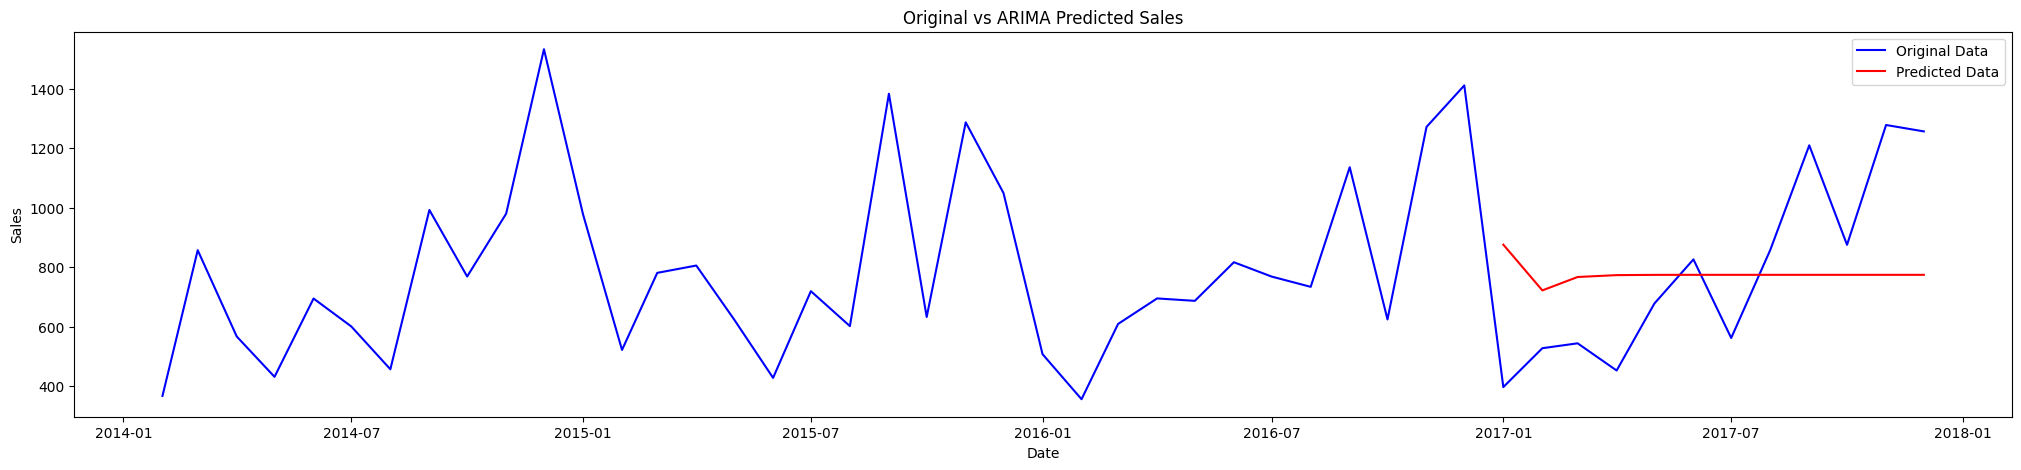

In [ ]:
# Plot the actual values and predictions
plt.figure(figsize=(25,5))

plt.plot(furniture_df.index, furniture_df['Sales'], label='Original Data', color='blue')
plt.plot(test_df.index, predictions, label='Predicted Data', color='red')

plt.title('Original vs ARIMA Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 97257.86414425618
Mean Absolute Error (MAE): 264.953966777737
Root Mean Squared Error (RMSE): 311.86193121998105


**Finding best  p,d,q values  to make better fit**

In [ ]:
import itertools
import warnings
warnings.filterwarnings("ignore")

# Define the range of p, d, q values to try
p_values = range(0, 3)  # Autoregressive order
d_values = range(0, 2)  # Order of differencing
q_values = range(0, 3)  # Moving average order

# Create a list of all possible combinations of p, d, q values
pdq_values = list(itertools.product(p_values, d_values, q_values))

# Initialize variables to store the best model and AIC value
best_model = None
best_aic = float('inf')

# Iterate through all combinations of p, d, q values
for pdq in pdq_values:
    try:
        # Fit the ARIMA model on the training data
        arima_model = ARIMA(train_df['Sales'], order=pdq)
        arima_model_fit = arima_model.fit()

        # Get the AIC value for the current model
        aic = arima_model_fit.aic

        # Check if the current model has a lower AIC value than the best model so far
        if aic < best_aic:
            best_aic = aic
            best_model = arima_model_fit
            best_pdq = pdq

        print(f"ARIMA{pdq} - AIC: {aic}")
    except:
        continue

# Print the best model and its AIC value
print(f"Best Model: ARIMA{best_pdq} - AIC: {best_aic}")

ARIMA(0, 0, 0) - AIC: 518.330224620073
ARIMA(0, 0, 1) - AIC: 520.0097119277688
ARIMA(0, 0, 2) - AIC: 521.9821249440319
ARIMA(0, 1, 0) - AIC: 522.1156892690892
ARIMA(0, 1, 1) - AIC: 508.97077895260776
ARIMA(0, 1, 2) - AIC: 510.3752474807175
ARIMA(1, 0, 0) - AIC: 520.0107160877094
ARIMA(1, 0, 1) - AIC: 521.7686882637304
ARIMA(1, 0, 2) - AIC: 520.872969767963
ARIMA(1, 1, 0) - AIC: 517.2456252650068
ARIMA(1, 1, 1) - AIC: 510.36302292729204
ARIMA(1, 1, 2) - AIC: 512.2925887732467
ARIMA(2, 0, 0) - AIC: 522.01246414568
ARIMA(2, 0, 1) - AIC: 523.771485316906
ARIMA(2, 0, 2) - AIC: 514.3412723445879
ARIMA(2, 1, 0) - AIC: 513.279479534669
ARIMA(2, 1, 1) - AIC: 515.2678392528944
ARIMA(2, 1, 2) - AIC: 514.3103399863912
Best Model: ARIMA(0, 1, 1) - AIC: 508.97077895260776


**Training ARIMA Model with best_fit**

In [ ]:
# Identify the order of the ARIMA model
# Best Model: ARIMA(0, 1, 1) - AIC: 508.97077895260776

# Fit the ARIMA model on the training data
best_arima_model = ARIMA(train_df['Sales'], order=(0,1,1))
best_arima_model_fit = best_arima_model.fit()

# Print AIC value#### Training ARIMA Model with best_fit
print(f"AIC: {best_arima_model_fit.aic}")

AIC: 508.97077895260776


In [ ]:
# Make predictions on the test data using the best model
predictions = best_model.predict(start=test_df.index[0], end=test_df.index[-1])

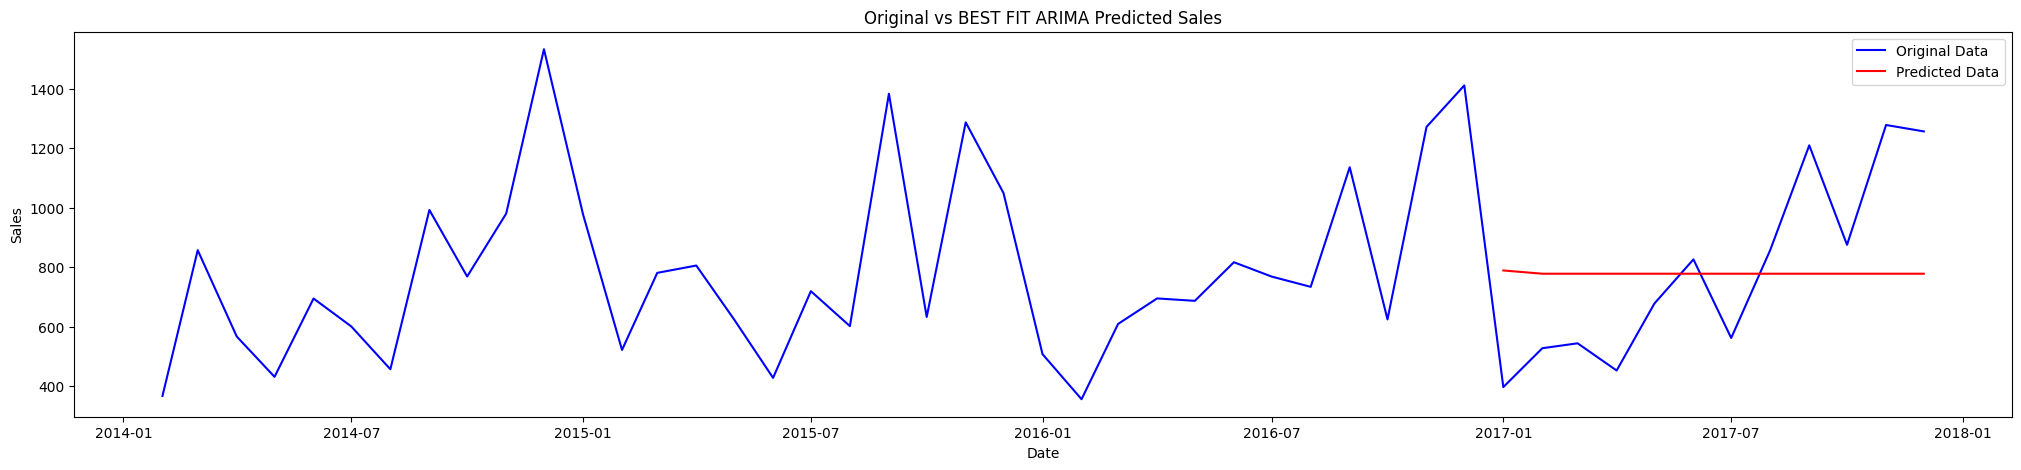

In [ ]:
# Plot the actual values and predictions
plt.figure(figsize=(25, 5))
plt.plot(furniture_df.index, furniture_df['Sales'], label='Original Data', color='blue')
plt.plot(test_df.index, predictions, label='Predicted Data', color='red')
plt.title('Original vs BEST FIT ARIMA Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 92889.9363507402
Mean Absolute Error (MAE): 262.47118648596137
Root Mean Squared Error (RMSE): 304.7785037543498


# Seasonal Auto Regression Moving Average(SARIMA)

In [ ]:
p = range(0, 2)  # Autoregressive order
d = range(0, 2)  # Order of differencing
q = range(0, 2)  # Moving average order

In [ ]:
pdq = list(itertools.product(p,d,q))

In [ ]:
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in pdq]

In [ ]:
import warnings
import statsmodels.api as sm

# Ignore warnings
warnings.filterwarnings("ignore")

best_aic = float('inf')
best_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_df, order=param, seasonal_order=param_seasonal,
                                           enforce_stationarity=False, enforce_invertibility=False)
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")
                results = mod.fit(disp=False)

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

            if results.aic < best_aic:
                best_aic = results.aic
                best_model = results

        except:
            continue

print('Best Model: ARIMA{}x{}12 - AIC:{}'.format(best_model.specification.order,best_model.specification.seasonal_order,best_aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:573.3052783058862
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:363.4566255396939
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:320.19623123335606
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:148.3472072319687
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:335.1762123396807
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:321.4649749673055
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:160.87278789629937
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:150.16734248014268
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:534.8574571191264
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:338.4229798809538
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:309.1630952644371
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:136.7488761925255
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:337.45000726019583
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:313.54410796877255
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:162.28940264377823
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:137.80363442371606
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:506.8138426423633
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:324.92357647843454
AR

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Best Model: ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:150.29683945142025


# Fit the SARIMA model on the training data
sarima_model = SARIMAX(train_df['Sales'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)

In [ ]:
# Make predictions on the test data
predictions = sarima_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

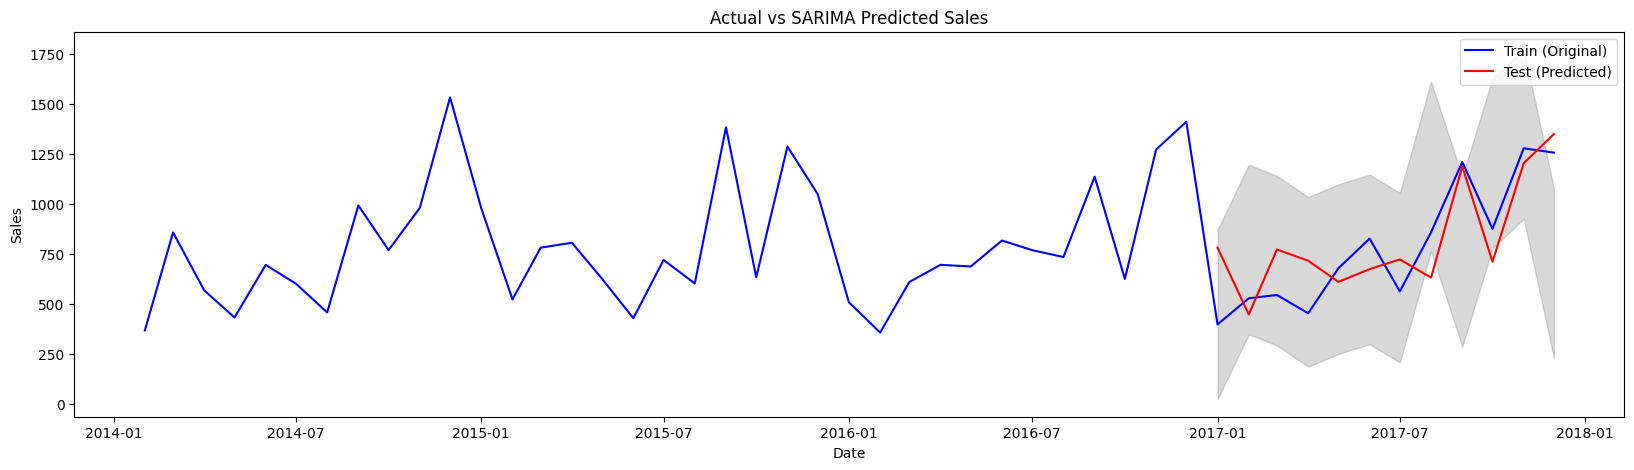

In [ ]:
# Plot the actual values and predictions
plt.figure(figsize=(20,5))
plt.plot(furniture_df.index, furniture_df['Sales'], label='Train (Original)', color='blue')
plt.plot(test_df.index, predictions, label='Test (Predicted)', color='red')

# Add confidence intervals
pred_confidence = sarima_model_fit.get_forecast(len(test_df)).conf_int()
plt.fill_between(test_df.index, pred_confidence.iloc[:, 0], pred_confidence.iloc[:, 1], color='gray', alpha=0.3)

plt.title('Actual vs SARIMA Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 35053.864923058434
Mean Absolute Error (MAE): 159.56071461428334
Root Mean Squared Error (RMSE): 187.22677405504382


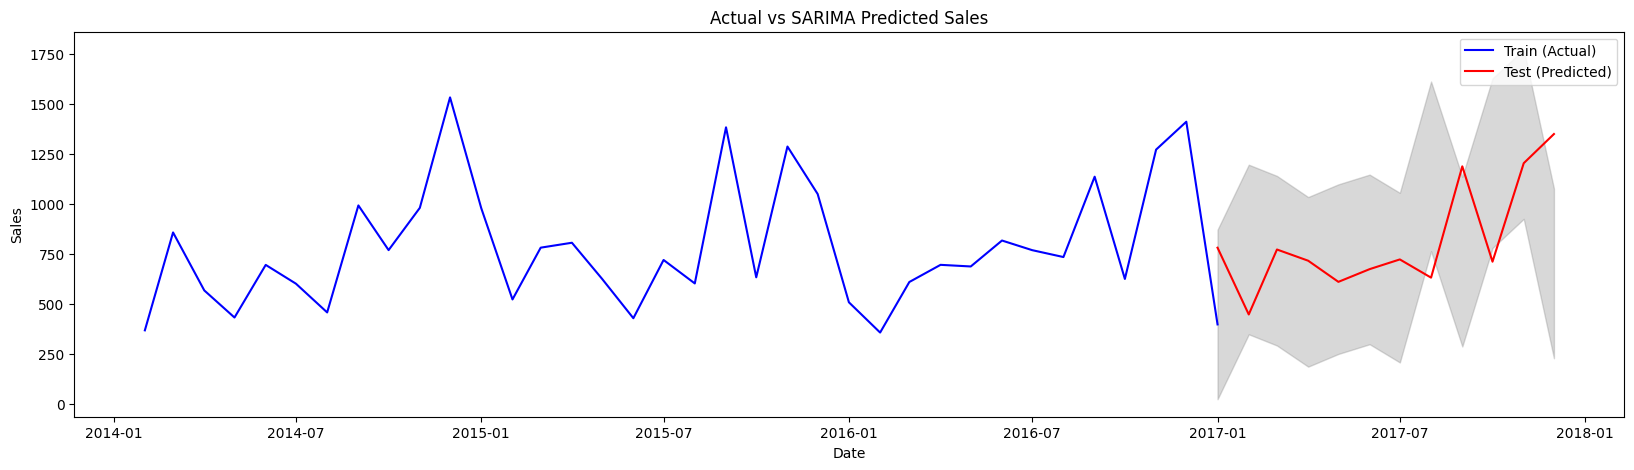

In [ ]:
# Plot the actual values and predictions
plt.figure(figsize=(20,5))
plt.plot(train_df.index, train_df['Sales'], label='Train (Actual)', color='blue')
#plt.plot(furniture_df.index, furniture_df['Sales'], label='Train (Original)', color='blue')
plt.plot(test_df.index, predictions, label='Test (Predicted)', color='red')

# Add confidence intervals
pred_confidence = sarima_model_fit.get_forecast(len(test_df)).conf_int()
plt.fill_between(test_df.index, pred_confidence.iloc[:, 0], pred_confidence.iloc[:, 1], color='gray', alpha=0.3)

plt.title('Actual vs SARIMA Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

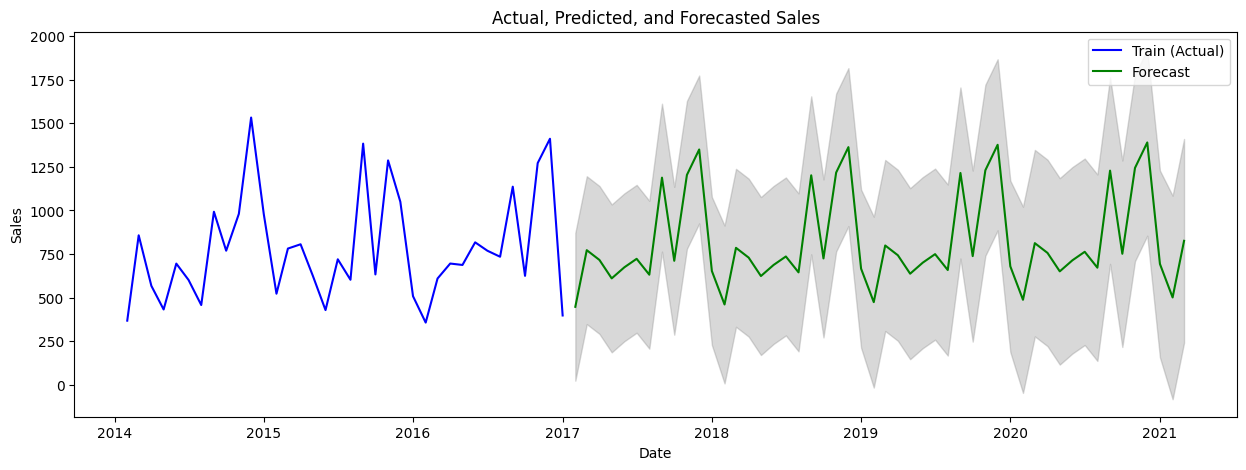

In [ ]:
# Forecast for the next 50 steps
forecast = sarima_model_fit.get_forecast(steps=50)

# Get the predicted values
predicted_values = forecast.predicted_mean

# Get the confidence intervals
pred_confidence = forecast.conf_int()

# Plot the actual values, predictions, and forecasted values with confidence intervals
plt.figure(figsize=(15, 5))
plt.plot(train_df.index, train_df['Sales'], label='Train (Actual)', color='blue')
#plt.plot(furniture_df.index, furniture_df['Sales'], label='Train (Original)', color='blue')
#plt.plot(test_df.index, predictions, label='Test (Predicted)', color='red')
plt.plot(predicted_values.index, predicted_values, label='Forecast', color='green')

# Add confidence intervals for the forecasted values
plt.fill_between(pred_confidence.index, pred_confidence.iloc[:, 0], pred_confidence.iloc[:, 1], color='gray', alpha=0.3)

plt.title('Actual, Predicted, and Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

#SARIMAX

Exponential smoothing model s
- **Simple Exponential Smoothing**
- **Holt’s Linear Trend method**
- **Holt-Winters Method**

Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train and fit the model
exp_smoothing_model = ExponentialSmoothing(train_df['Sales'])
exp_smoothing_model_fit = exp_smoothing_model.fit()

# Print AIC value
print(f"AIC: {exp_smoothing_model_fit.aic}")

AIC: 420.4725957289741


In [ ]:
# Make predictions on the test data
predictions = exp_smoothing_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

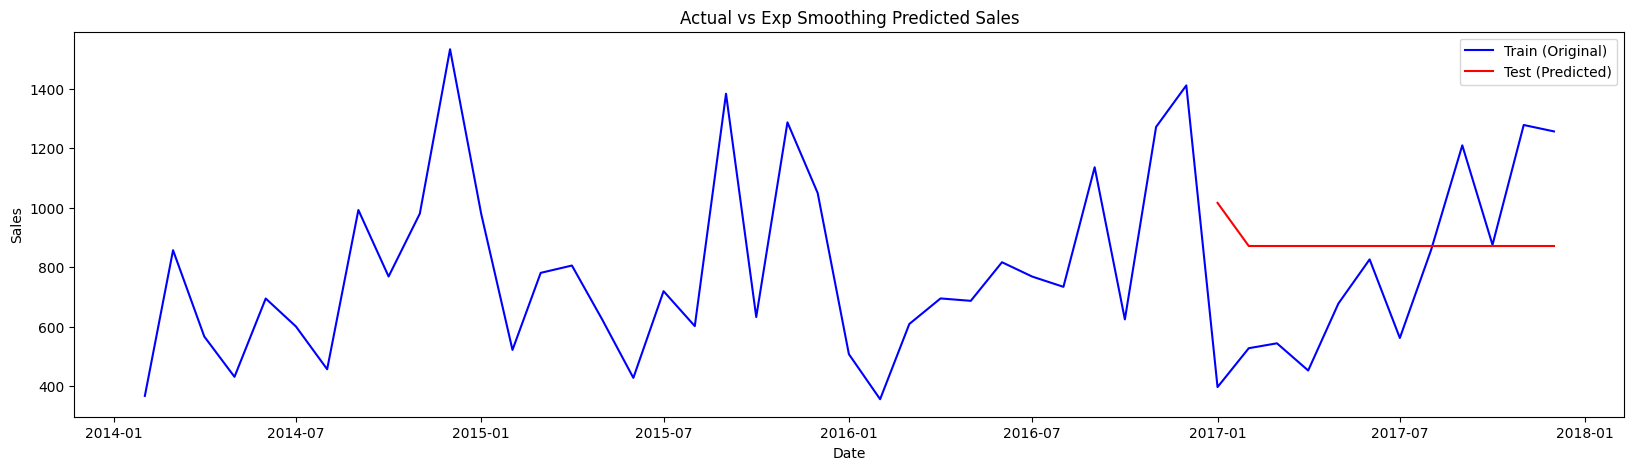

In [ ]:
# Plot the actual values and predictions
plt.figure(figsize=(20,5))
plt.plot(furniture_df.index, furniture_df['Sales'], label='Train (Original)', color='blue')
plt.plot(test_df.index, predictions, label='Test (Predicted)', color='red')

plt.title('Actual vs Exp Smoothing Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

Holt’s Linear Trend method

In [ ]:
from statsmodels.tsa.holtwinters import Holt

# Train and fit the model
holt_model = Holt(train_df['Sales'])
holt_model_fit = holt_model.fit()

# Print AIC value
print(f"AIC: {holt_model_fit.aic}")

AIC: 443.44288365512375


In [ ]:
# Make predictions on the test data
predictions = holt_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

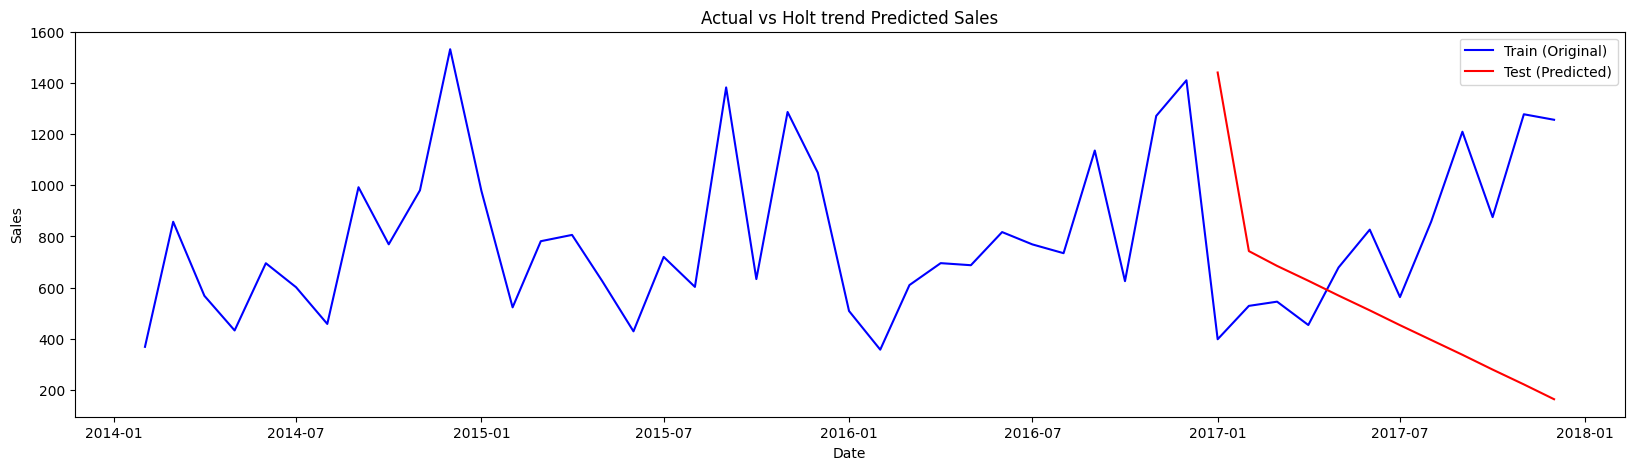

In [ ]:
# Plot the actual values and predictions
plt.figure(figsize=(20,5))
plt.plot(furniture_df.index, furniture_df['Sales'], label='Train (Original)', color='blue')
plt.plot(test_df.index, predictions, label='Test (Predicted)', color='red')

plt.title('Actual vs Holt trend Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 412712.8916103048
Mean Absolute Error (MAE): 515.7274138889751
Root Mean Squared Error (RMSE): 642.4273434485061


Holt-Winters Method

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train and fit the model
holtwinters_model = ExponentialSmoothing(train_df['Sales'], trend='add', seasonal='add', seasonal_periods=12)
holtwinters_model_fit = holtwinters_model.fit()

# Print AIC value
print(f"AIC: {holtwinters_model_fit.aic}")

AIC: 396.2937591340576


In [ ]:
# Make predictions on the test data
predictions = holtwinters_model_fit.predict(start=test_df.index[0], end=test_df.index[-1])

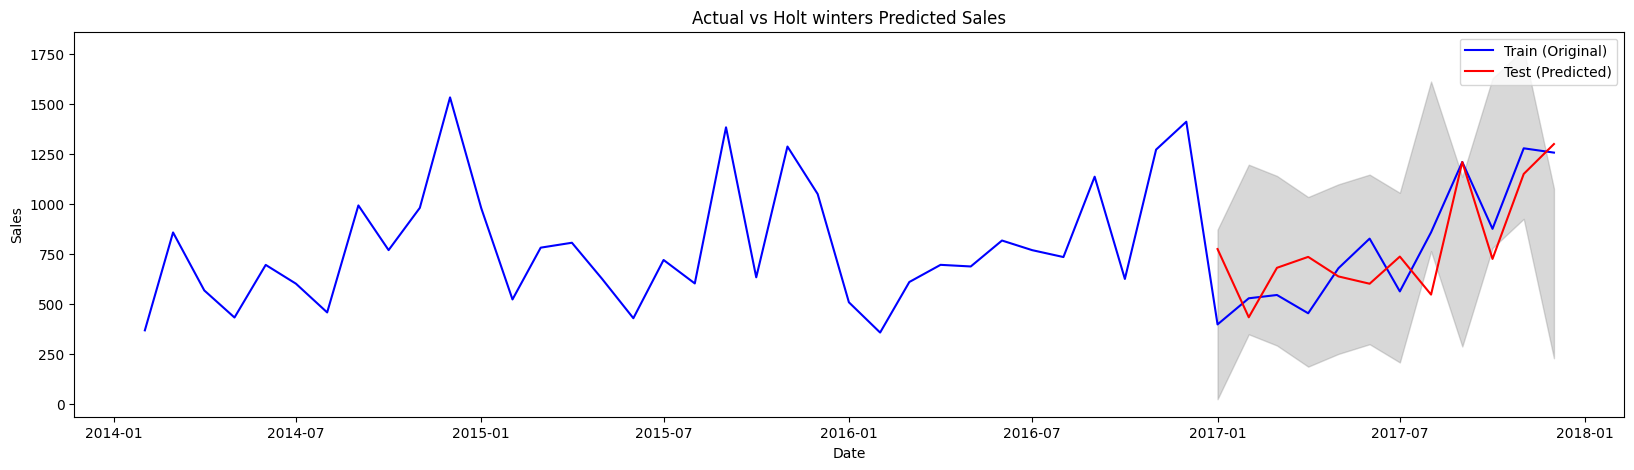

In [ ]:
# Plot the actual values and predictions
plt.figure(figsize=(20,5))
plt.plot(furniture_df.index, furniture_df['Sales'], label='Train (Original)', color='blue')
plt.plot(test_df.index, predictions, label='Test (Predicted)', color='red')

# Add confidence intervals
pred_confidence = sarima_model_fit.get_forecast(len(test_df)).conf_int()
plt.fill_between(test_df.index, pred_confidence.iloc[:, 0], pred_confidence.iloc[:, 1], color='gray', alpha=0.3)

plt.title('Actual vs Holt winters Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model
mse = np.mean((predictions - test_df['Sales'])**2)  # Mean Squared Error
mae = np.mean(np.abs(predictions - test_df['Sales']))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 39115.26179592612
Mean Absolute Error (MAE): 163.55943322836464
Root Mean Squared Error (RMSE): 197.77578667755594


The Holts-winter method performs and captures the patterns and seasonalities similar to the SARIMA best model fit. Both of the plots look similar .However, when observed SARIMA model has least MAE so we forecasted the future values using SARIMA Model